In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("1. Weather Data.csv",sep=",")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# Project 2

## Q1 Data Overview and Cleaning

### Q 1a What are the key characteristics of the dataset? (e.g., number of records, features, data types)


In [6]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#### Number of Records = 8 columns
#### Features = Date/Time, Temperature, Dew Point Temperature, Relative Humidity, Wind Speed_km/h, Visibility_km Press_kPa, Weather_Condition

### 1b Identify and handle any missing or null values. Describe your approach and reasoning.

In [10]:
print(df.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


#### There are zero NULL Values

### 1c Check for and address any duplicate records.

In [14]:
sum(df.duplicated())

0

#### No Duplicate found

## Q2 Statistical Summary

### Q2a Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.

In [19]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### Q2b Identify and describe any significant outliers in the data.

## Q3 Data Visualization

In [48]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

### Q3a Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

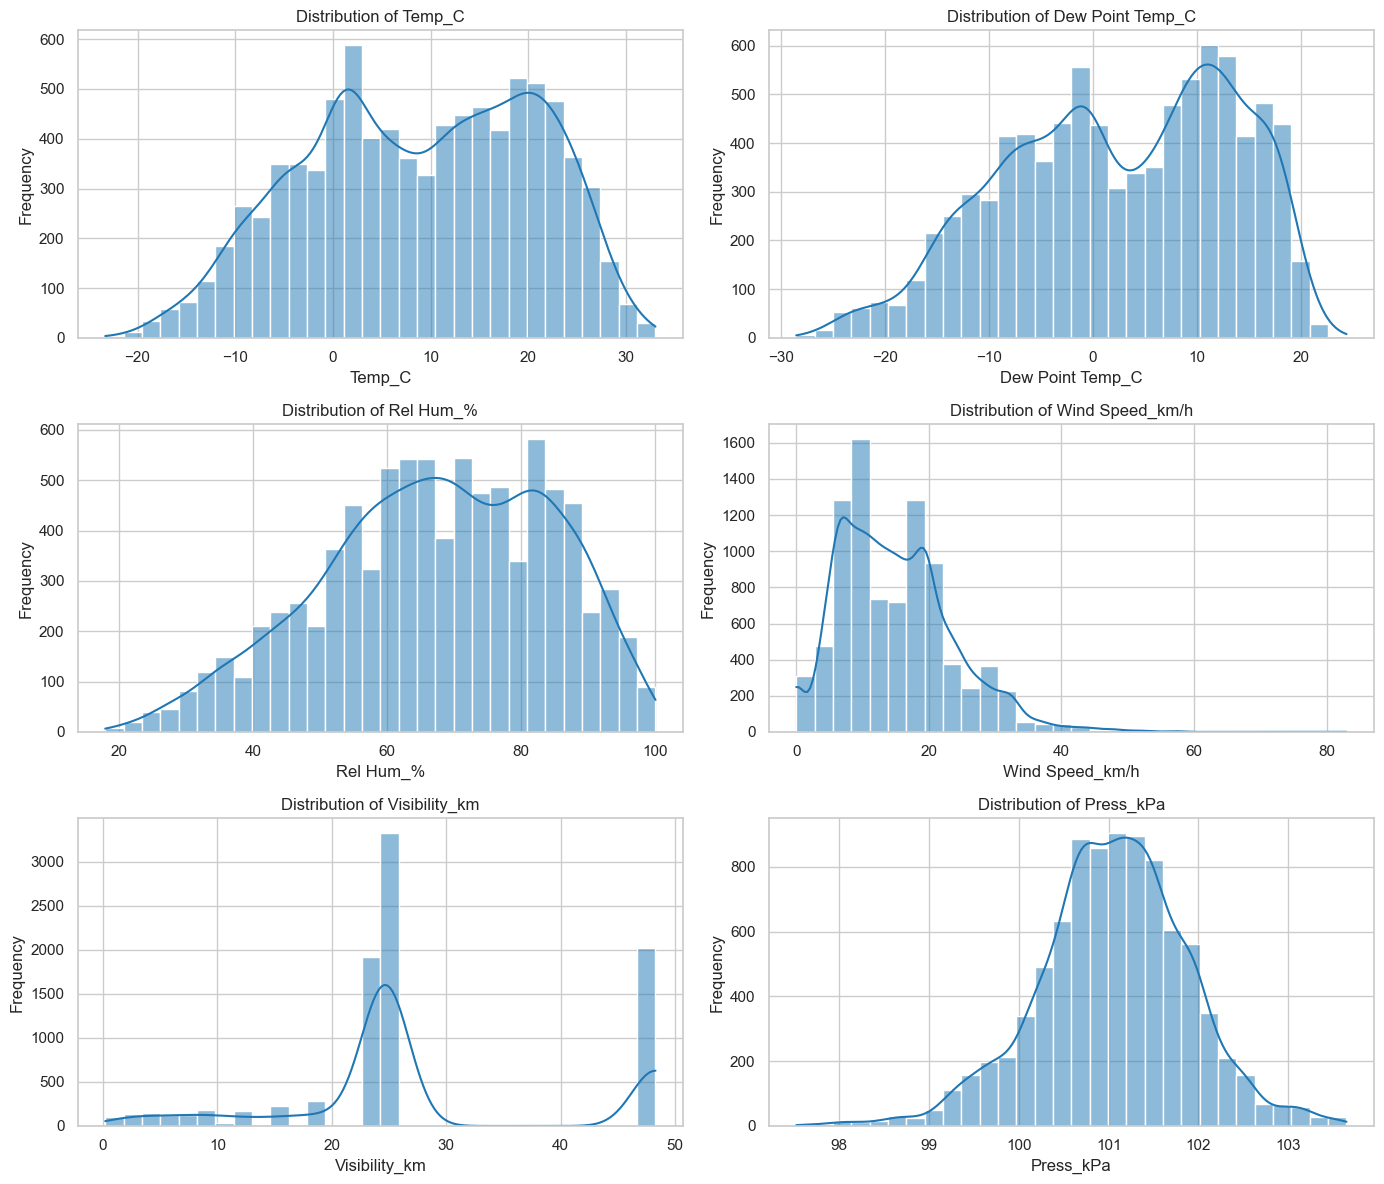

In [69]:
sns.set(style="whitegrid")

columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

plt.figure(figsize=(14, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='tab:blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Q3b Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.

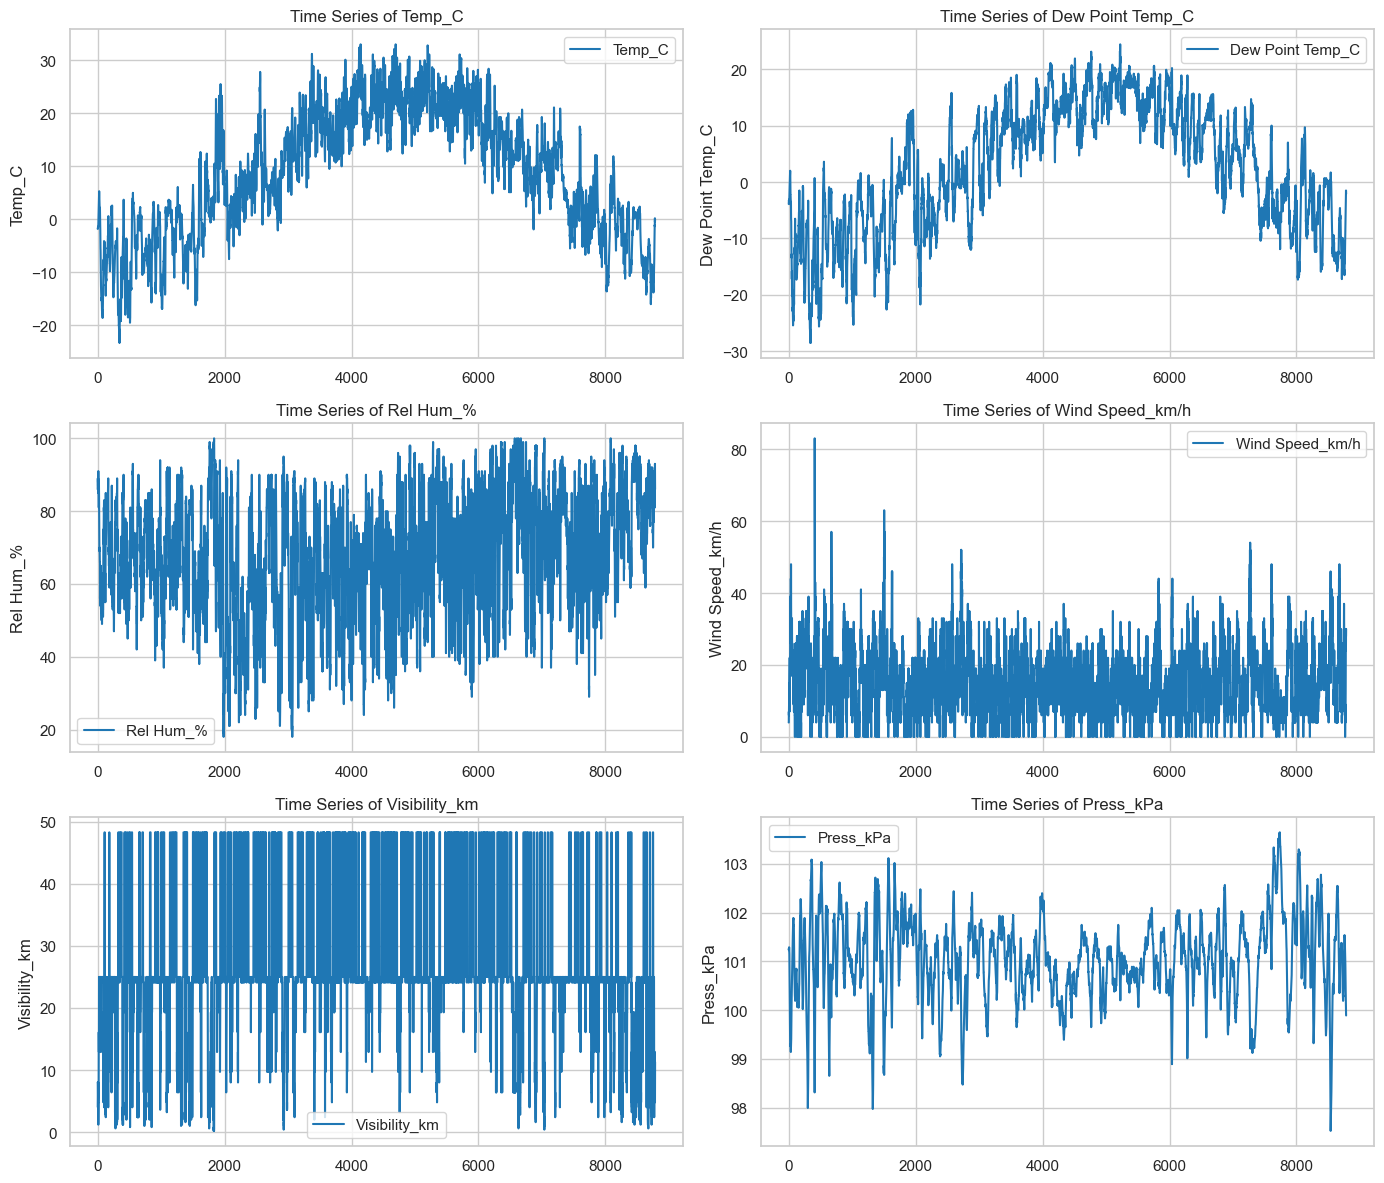

In [65]:

# Set the style for the plots
sns.set(style="whitegrid")

# Plot time series for each weather parameter
plt.figure(figsize=(14, 12))

# List of columns to plot
columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df.index, df[col], color='tab:blue', label=col)
    plt.title(f'Time Series of {col}')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

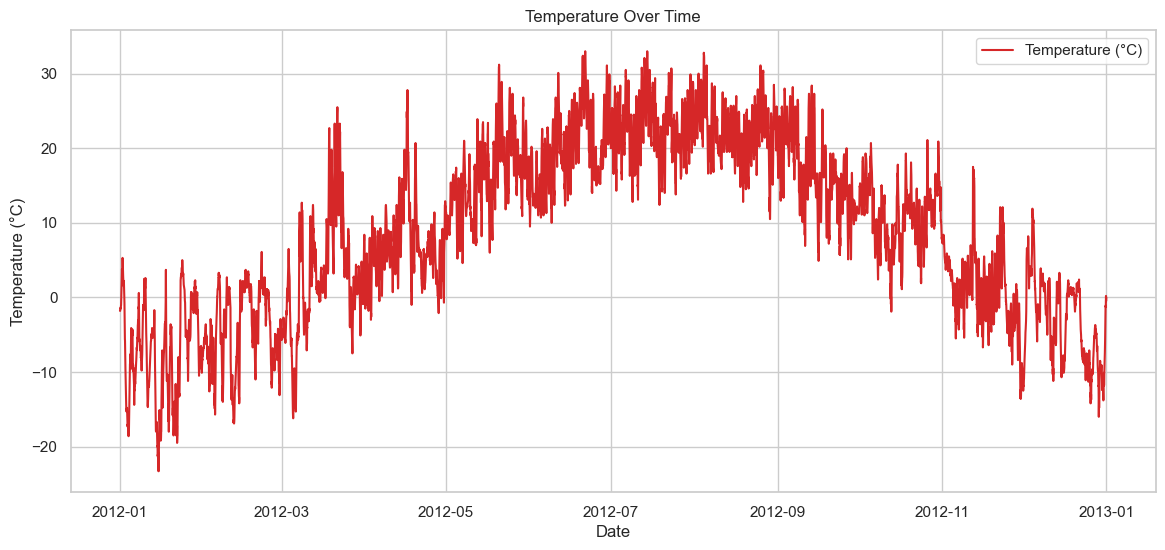

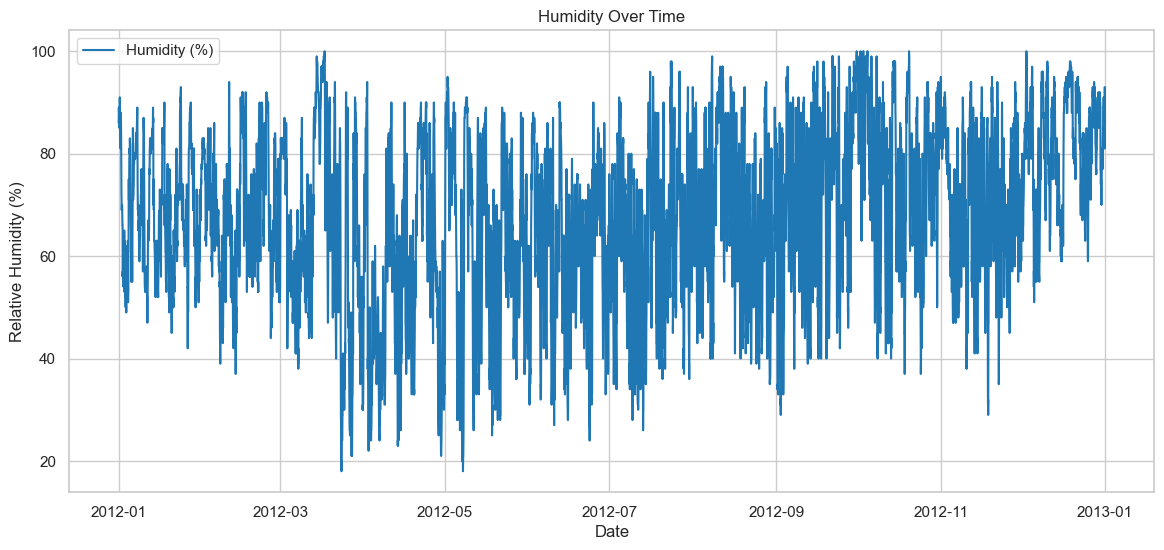

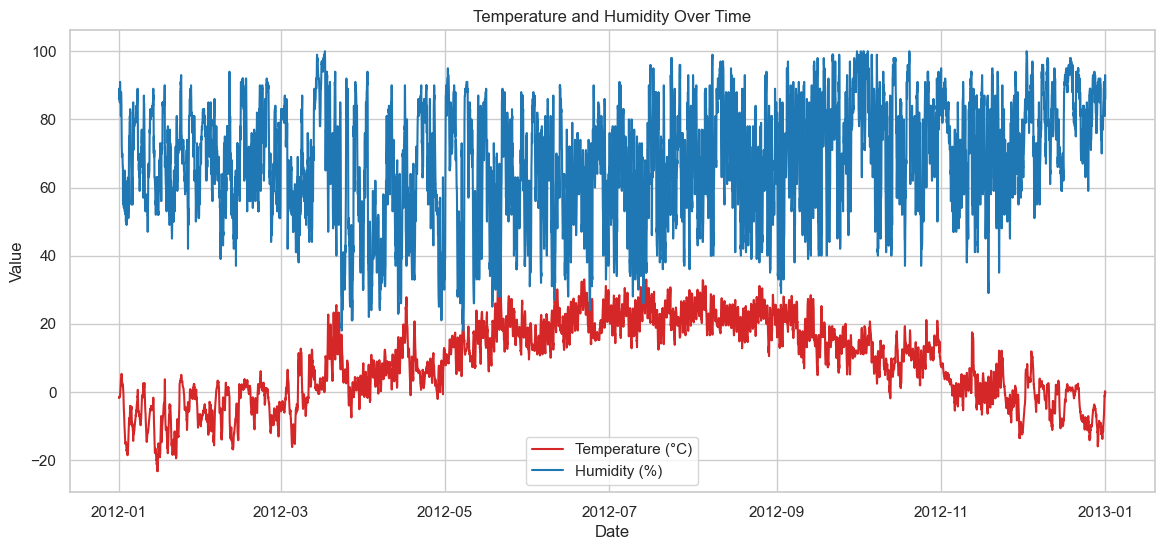

In [63]:
# Plotting Temperature Time Series
plt.figure(figsize=(14, 6))
plt.plot(df['Date/Time'], df['Temp_C'], color='tab:red', label='Temperature (°C)')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Humidity Time Series
plt.figure(figsize=(14, 6))
plt.plot(df['Date/Time'], df['Rel Hum_%'], color='tab:blue', label='Humidity (%)')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting both Temperature and Humidity in one figure
plt.figure(figsize=(14, 6))
plt.plot(df['Date/Time'], df['Temp_C'], color='tab:red', label='Temperature (°C)')
plt.plot(df['Date/Time'], df['Rel Hum_%'], color='tab:blue', label='Humidity (%)')
plt.title('Temperature and Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

### Q3c Create correlation matrices and heatmaps to identify relationships between different weather parameters.

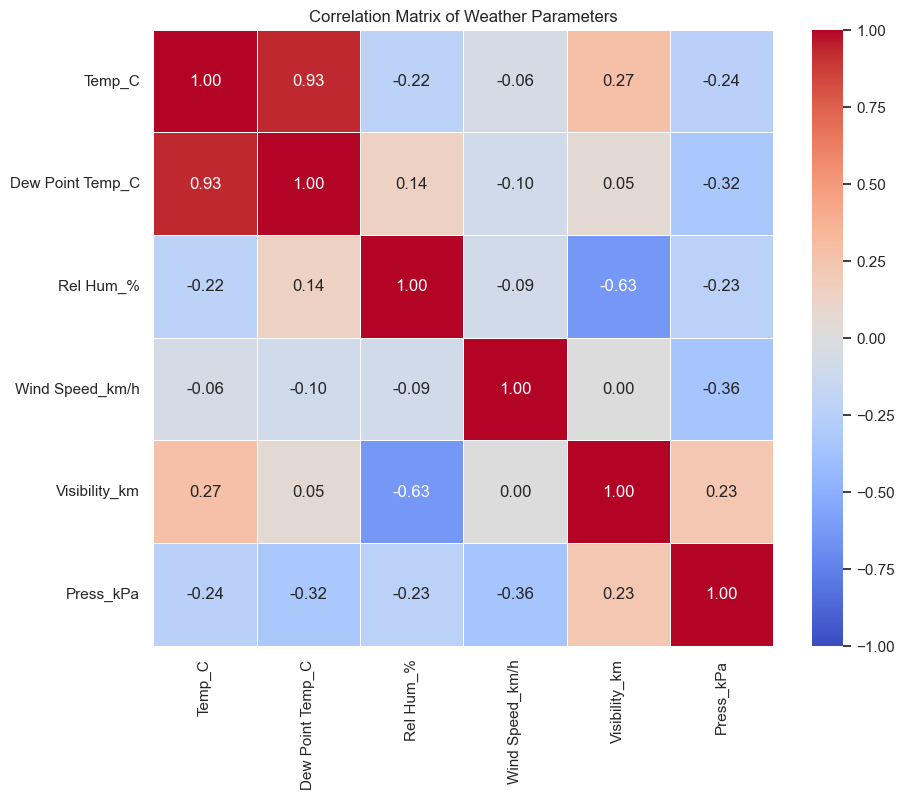

In [29]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)

# Set titles and labels
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

## 4 Weather Patterns and Trends:

### 4a Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?

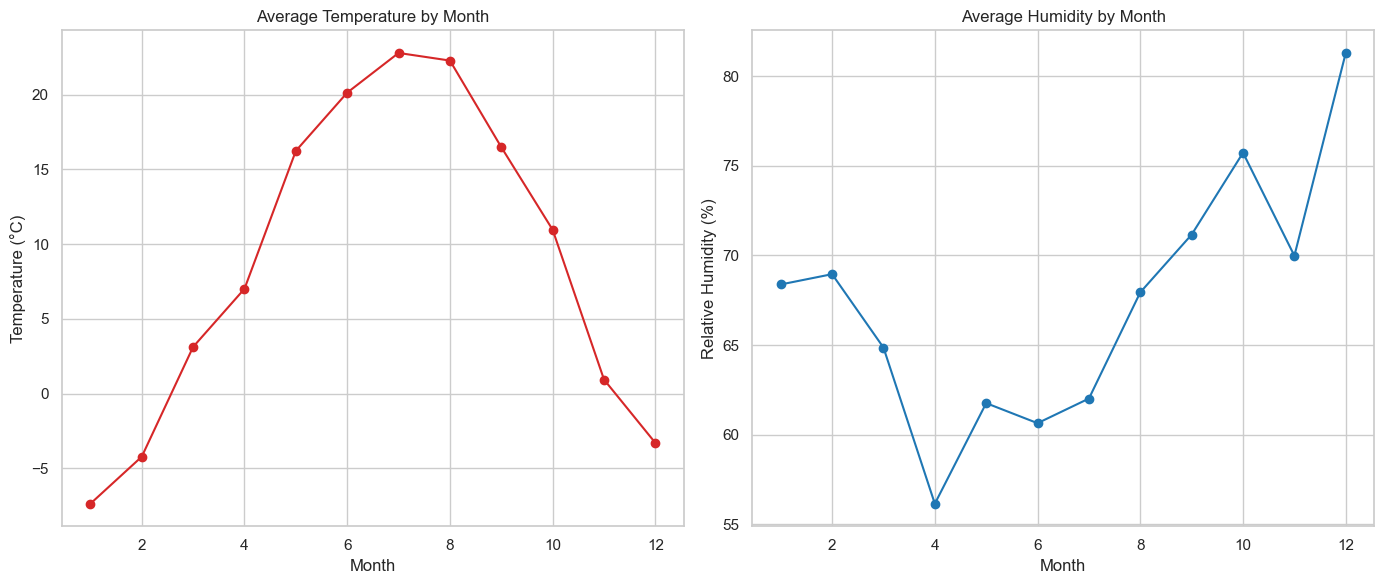

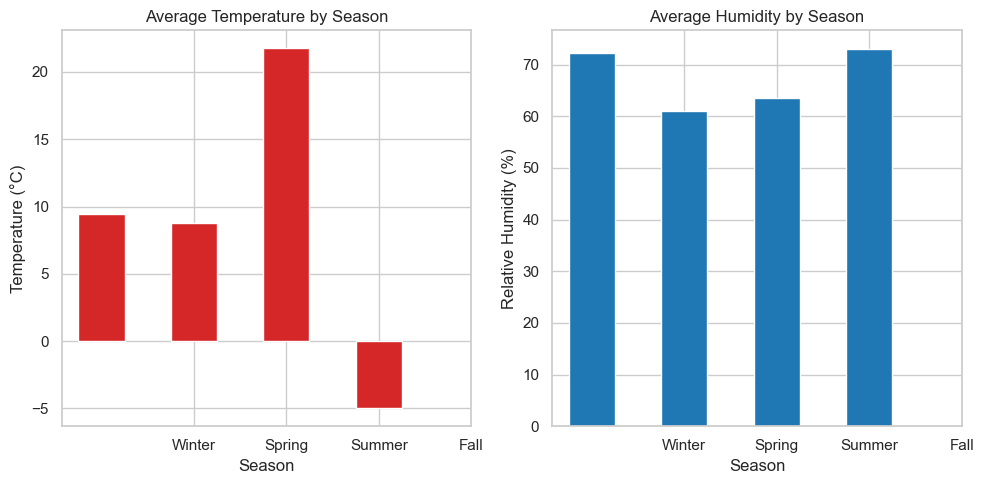

In [50]:
# Extract month and season from 'Date/Time'
df['Month'] = df['Date/Time'].dt.month
df['Season'] = df['Date/Time'].dt.month % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calculate average temperature and humidity by month and season
monthly_data = df.groupby('Month')[['Temp_C', 'Rel Hum_%']].mean()
seasonal_data = df.groupby('Season')[['Temp_C', 'Rel Hum_%']].mean()

# Plotting Monthly Averages
plt.figure(figsize=(14, 6))

# Temperature Plot
plt.subplot(1, 2, 1)
plt.plot(monthly_data.index, monthly_data['Temp_C'], marker='o', color='tab:red')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Humidity Plot
plt.subplot(1, 2, 2)
plt.plot(monthly_data.index, monthly_data['Rel Hum_%'], marker='o', color='tab:blue')
plt.title('Average Humidity by Month')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting Seasonal Averages
plt.figure(figsize=(10, 5))

# Temperature Plot
plt.subplot(1, 2, 1)
plt.bar(seasonal_data.index, seasonal_data['Temp_C'], color='tab:red', width=0.5)
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True, axis='y')

# Humidity Plot
plt.subplot(1, 2, 2)
plt.bar(seasonal_data.index, seasonal_data['Rel Hum_%'], color='tab:blue', width=0.5)
plt.title('Average Humidity by Season')
plt.xlabel('Season')
plt.ylabel('Relative Humidity (%)')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

### Q4b Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

## Q5 Insights and Conclusions:

### Q5a Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?

### Q5b How can these insights be useful for weather prediction or other practical applications?

## Q6 Recommendations for Further Analysis:

### Suggest areas for further analysis or additional data that might be useful to explore.